In [1]:
VERSION

v"1.1.1"

In [2]:
using Plots, Flux

In [3]:
d = 5
plot_x = plot_y = range(-1, stop=1, length=40)
pyplot(leg=true)

Plots.PyPlotBackend()

In [ ]:
l1 = @layout [a{0.7w} b]
u_true(x) = sin.((π .* view(x, 1, :, :) .^ 2 + view(x, 2, :, :) .^ 2) ./ 2)
u_true_plot(x, y) = u_true(vcat(x, y))[1]
plot(plot_x, plot_y, u_true_plot, st = [:surface, :contourf], layout=l1, title="True Function")

In [ ]:
using BSON

In [ ]:
u_theta_plot(x, y) = uθ(vcat(x, y, zeros(Float32, d -2, 1))).data[1]

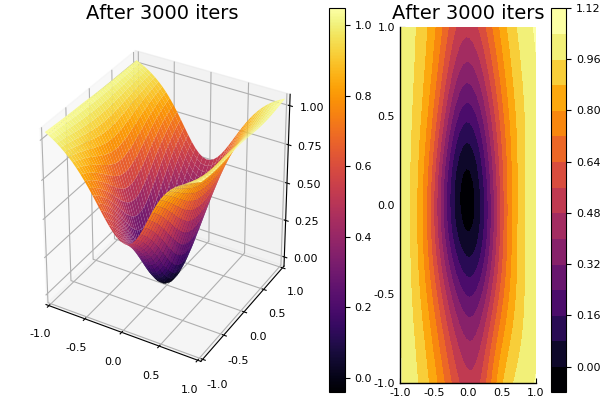

In [39]:
uθ = BSON.load("../wt/primal1000.bson")[:u1]
l2 = @layout [a{0.7w} b]
plot(plot_x, plot_y, u_theta_plot, st = [:surface, :contourf], layout=l2, title="After 1000 iters")

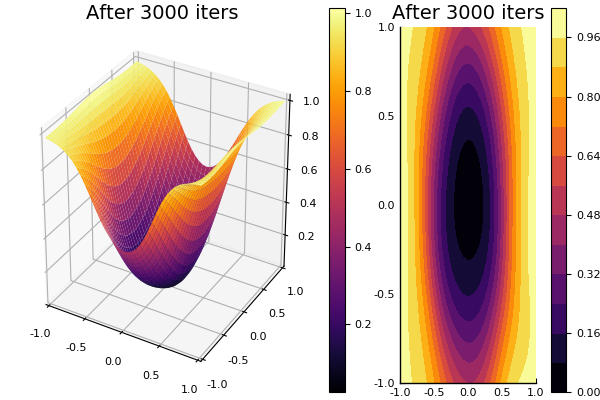

In [40]:
uθ = BSON.load("../wt/primal3000.bson")[:u1]
l2 = @layout [a{0.7w} b]
plot(plot_x, plot_y, u_theta_plot, st = [:surface, :contourf], layout=l2, title="After 3000 iters")

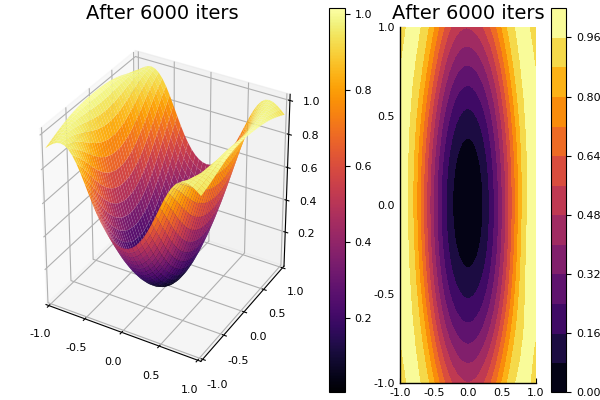

In [41]:
uθ = BSON.load("../wt/primal6000.bson")[:u1]
l2 = @layout [a{0.7w} b]
plot(plot_x, plot_y, u_theta_plot, st = [:surface, :contourf], layout=l2, title="After 6000 iters")

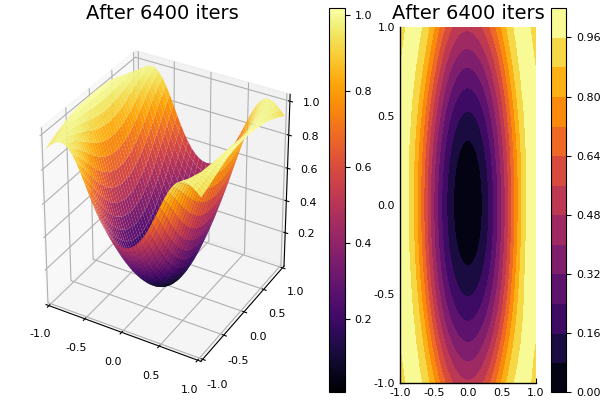

In [43]:
uθ = BSON.load("../wt/primal6400.bson")[:u1]
l2 = @layout [a{0.7w} b]
plot(plot_x, plot_y, u_theta_plot, st = [:surface, :contourf], layout=l2, title="After 6400 iters")

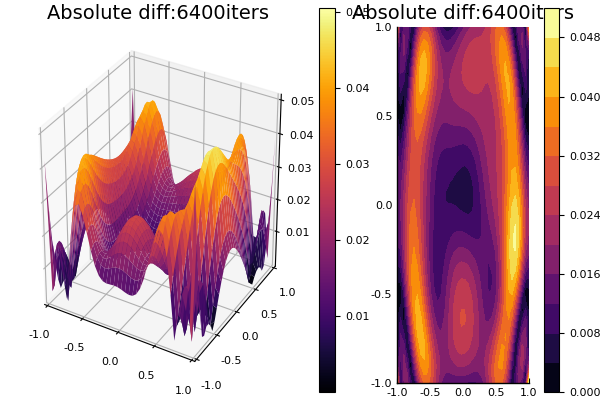

In [66]:
uθ = BSON.load("../wt/primal6400.bson")[:u1]
l3 = @layout [a{0.7w} b]
absolute_difference(x, y) = abs(u_theta_plot(x, y) - u_true_plot(x,y))
plot(plot_x, plot_y, absolute_difference, st = [:surface, :contourf], layout=l3, title="Absolute diff:6400iters")

In [73]:
max_diff = 0.0
pts = (-1, -1)
for x in plot_x, y in plot_y
    (abs(x) == 1.0 || abs(y) == 1.0) && continue # Taking inside the region
    diff = absolute_difference(x, y)
    diff <= max_diff && continue
    max_diff = diff
    pts = (x, y)
end
pts = Float32.(pts)
println("Maximum absolute difference inside the region = $(Float32(max_diff)) | at point $(pts)")

Maximum absolute difference inside the region = 0.04873872 | at point (0.7948718f0, -0.17948718f0)
